# Milestone 1
# Analyzing the Demand for Bike Sharing

Bike-sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

For this project, I will explore a dataset from Capital Bikeshare, a bike-sharing program in Washington, D.C. It is interesting to discover bike usage patterns with weather conditions and the nature of the day.

# I. First Acquiring the Dataset

1. Downloaing the data `Bike-Sharing-Dataset.zip` file from [Bike Sharing dataset in the Machine Learning Repository at UC Irvine](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset). Unzip the file and obtain file `day.csv`. Read the description of the dataset to learn the meaning of values in each column.

2. Loading the data from `day.csv` as a Pandas data frame and displaying its first 5 rows to confirm that the data is loaded correctly.

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/mohamedalbasuony/Downloads/bike+sharing+dataset/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


3. Displaying the shape of the data frame.

In [9]:
print(df.shape)

(731, 16)


4. Displaying the data type of each column

In [10]:
print(df.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


5. The default data type for 'dteday' is `object`. So i used [pd.to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) to convert it to `datetime` type.

In [11]:
df['dteday'] = pd.to_datetime(df['dteday'])
print('dteday After the conversion')
print(df.dtypes)

dteday After the conversion
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


6. Created a new column 'year' by extracting the year value from the datetime of each row.

In [12]:
df['year'] = df['dteday'].dt.year

7. In this step I removed the "casual" column and the "registered" column, because I'm solely interested in the total number of bike rentals, which is given in the "cnt" column. Also removing the following columns: 'instant', 'yr', 'atemp' and displaying the first 5 rows.

In [13]:
cols_removed = ['casual', 'registered', 'instant', 'yr', 'atemp']
df=df.drop(cols_removed, axis=1)
df.head()

,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year
0,2011-01-01,1,1,0,6,0,2,0.344167,0.805833,0.160446,985,2011
1,2011-01-02,1,1,0,0,0,2,0.363478,0.696087,0.248539,801,2011
2,2011-01-03,1,1,0,1,1,1,0.196364,0.437273,0.248309,1349,2011
3,2011-01-04,1,1,0,2,1,1,0.200000,0.590435,0.160296,1562,2011
4,2011-01-05,1,1,0,3,1,1,0.226957,0.436957,0.186900,1600,2011


8. In here I'm trying to find the number of missing values from each column.

In [14]:
missing_values= df.isnull().sum()
missing_values

dteday        0
season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
year          0
dtype: int64

## II. Data Exploration

1. The season feature: splited the data frame into four subsets according to the yearly seasons `data_spring`, `data_summer`, `data_fall`, `data_winter`. Thebn based on that I calculated and displayed the average bike rentals in each season to get a sense of how many bike renatls are there and if there is any variations. 

In [22]:
import matplotlib.pyplot as plt

# Creating data for each season
data_spring = df[df['season'] == 1]
data_summer = df[df['season'] == 2]
data_fall = df[df['season'] == 3]
data_winter = df[df['season'] == 4]

# Calculating the average bike rentals in all seasons
average_data_spring = round(data_spring['cnt'].mean(), 2)
average_data_summer = round(data_summer['cnt'].mean(), 2)
average_data_fall = round(data_fall['cnt'].mean(), 2)
average_data_winter = round(data_winter['cnt'].mean(), 2)

# Displaying the average bike rentals in all seasons
print("Avg Bike Rentals in Spring:", average_data_spring)
print("Avg Bike Rentals in Summer:", average_data_summer)
print("Avg Bike Rentals in Fall:", average_data_fall)
print("Avg Bike Rentals in Winter:", average_data_winter)

Avg Bike Rentals in Spring: 2604.13
Avg Bike Rentals in Summer: 4992.33
Avg Bike Rentals in Fall: 5644.3
Avg Bike Rentals in Winter: 4728.16


1a. Then I wanted a better reprsentaion of these average values, hence a line graph seems to showing an easy visuals to understand by anyone. 

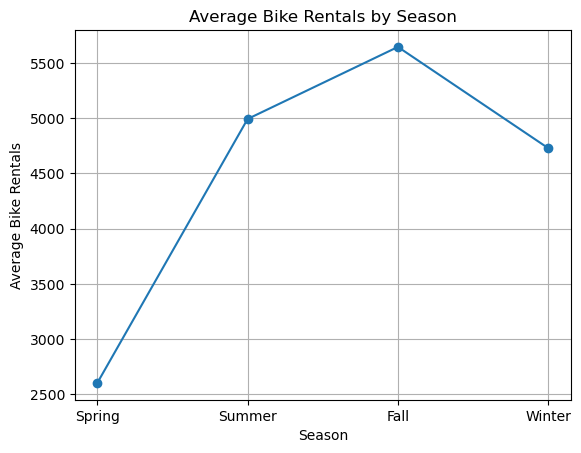

In [23]:
# Plotting the data
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
averages = [average_data_spring, average_data_summer, average_data_fall, average_data_winter]

plt.plot(seasons, averages, marker='o', linestyle='-')
plt.title('Average Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Bike Rentals')
plt.grid(True)
plt.show()

2. Calculating and displaying the average bike rentals for holidays and non-holidays, separately using the the 'holiday' feature.

Avg Bike Rentals on Holidays: 3735.0
Avg Bike Rentals on Non-Holidays: 4527.1


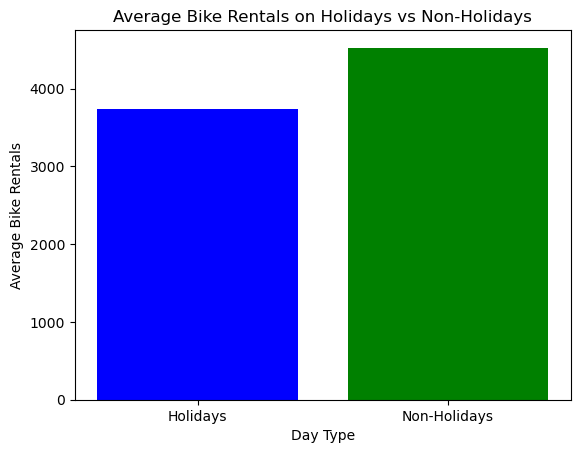

In [25]:
# Calculating the average bike rentals on holidays and non-holidays
average_bike_rentals_holiday = round(df[df['holiday'] == 1]['cnt'].mean(), 2)
average_bike_rentals_non_holiday = round(df[df['holiday'] == 0]['cnt'].mean(), 2)

# Displaying the average bike rentals on holidays and non-holidays
print("Avg Bike Rentals on Holidays:", average_bike_rentals_holiday)
print("Avg Bike Rentals on Non-Holidays:", average_bike_rentals_non_holiday)

# Plotting the data
categories = ['Holidays', 'Non-Holidays']
averages = [average_bike_rentals_holiday, average_bike_rentals_non_holiday]

plt.bar(categories, averages, color=['blue', 'green'])
plt.title('Average Bike Rentals on Holidays vs Non-Holidays')
plt.xlabel('Day Type')
plt.ylabel('Average Bike Rentals')
plt.show()

3.  Calculating and displaying the average bike rentals for working days and weekends, separately using the 'workingday' feature.

Avg Bike Rentals on Working Day: 4584.82
Avg Bike Rentals on Non-Working Day: 4330.17


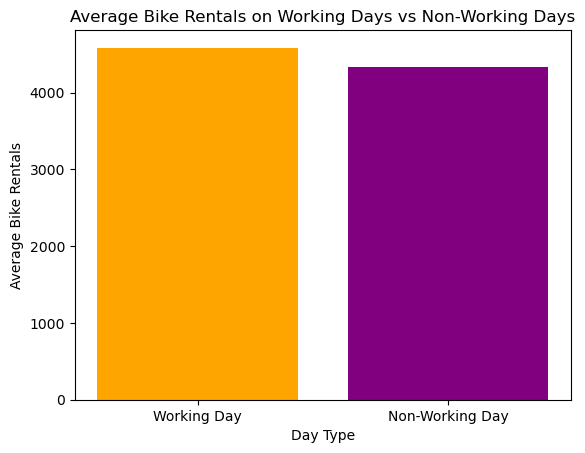

In [26]:
# Calculating the average bike rentals on working days and non-working days
average_bike_rentals_workingday = round(df[df['workingday'] == 1]['cnt'].mean(), 2)
average_bike_rentals_non_workingday = round(df[df['workingday'] == 0]['cnt'].mean(), 2)

# Displaying the average bike rentals on working days and non-working days
print("Avg Bike Rentals on Working Day:", average_bike_rentals_workingday)
print("Avg Bike Rentals on Non-Working Day:", average_bike_rentals_non_workingday)

# Plotting the data
categories = ['Working Day', 'Non-Working Day']
averages = [average_bike_rentals_workingday, average_bike_rentals_non_workingday]

plt.bar(categories, averages, color=['orange', 'purple'])
plt.title('Average Bike Rentals on Working Days vs Non-Working Days')
plt.xlabel('Day Type')
plt.ylabel('Average Bike Rentals')
plt.show()

4. Calculating and displaying the average bike-rentals for each weather type using the 'weathersit' feature

Average bike rentals for each weather type:
Weather Type: 1
Average Bike Rentals: 4876.7861771058315

Weather Type: 2
Average Bike Rentals: 4035.862348178138

Weather Type: 3
Average Bike Rentals: 1803.2857142857142



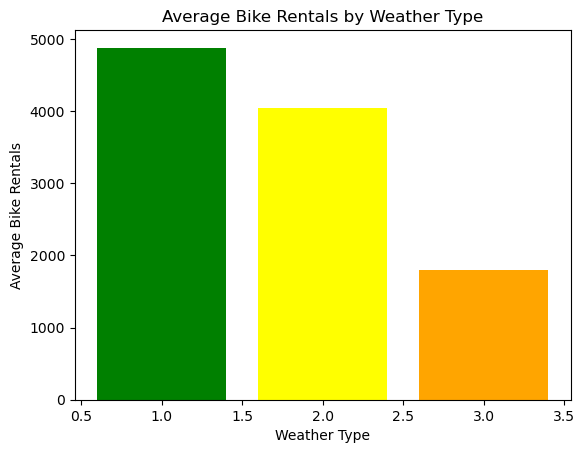

In [30]:
# Calculating the average bike rentals for each weather type
average_rentals_by_weather = df.groupby('weathersit')['cnt'].mean()

# Displaying the average bike rentals for each weather type
print("Average bike rentals for each weather type:")
for weather_type, avg_rentals in average_rentals_by_weather.items():
    print("Weather Type:", weather_type)
    print("Average Bike Rentals:", avg_rentals)
    print()

# Plotting the data
weather_types = df['weathersit'].unique()  # Get unique weather types dynamically
weather_types.sort()  # Sort weather types
average_rentals = [average_rentals_by_weather[weather_type] for weather_type in weather_types]

plt.bar(weather_types, average_rentals, color=['green', 'yellow', 'orange', 'red'])
plt.title('Average Bike Rentals by Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('Average Bike Rentals')
plt.show()

5. Calculating and displaying the average bike rentals in each year using the 'year' feature

Average bike rentals in each year:
Year: 2011
Average Bike Rentals: 3405.7616438356163

Year: 2012
Average Bike Rentals: 5599.934426229508



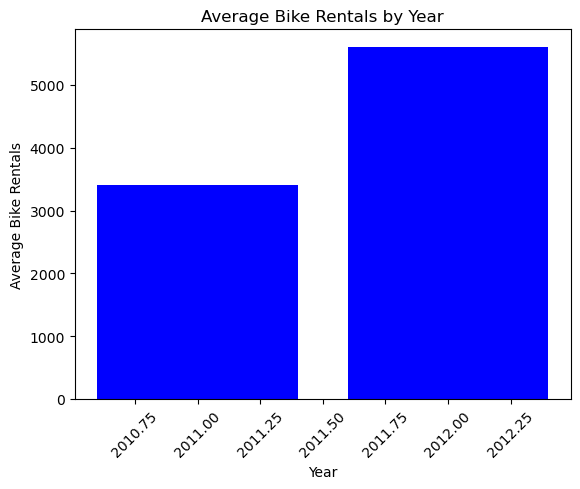

In [40]:
average_bike_rentals_by_year = df.groupby('year')['cnt'].mean()

# Displaying the average bike rentals for each year
print("Average bike rentals in each year:")
for year, avg_rentals in average_bike_rentals_by_year.items():
    print("Year:", year)
    print("Average Bike Rentals:", avg_rentals)
    print()

# Plotting the data
years = average_bike_rentals_by_year.index
average_rentals = average_bike_rentals_by_year.values

plt.bar(years, average_rentals, color='blue')
plt.title('Average Bike Rentals by Year')
plt.xlabel('Year')
plt.ylabel('Average Bike Rentals')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

6. The 'temp' feature: as temperature is a countinous feature, its relationship with the 'count' feature can be visualized as a scatter plot. Create a scatter plot with 'temp' and 'count'. Label the axis correctly.

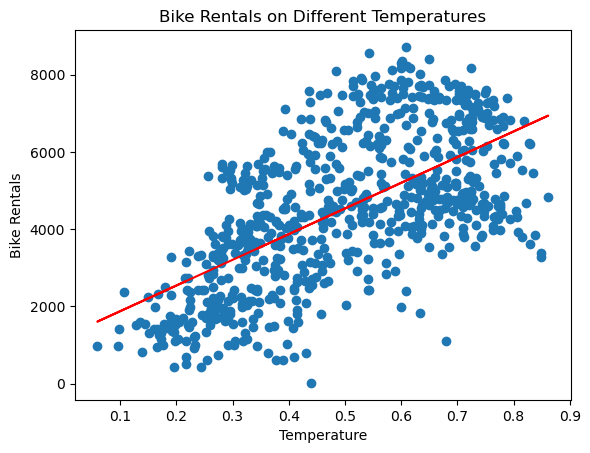

In [41]:
import numpy as np

# Scatter plot
plt.scatter(df['temp'], df['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Bike Rentals')
plt.title('Bike Rentals on Different Temperatures')

# Calculating regression line
slope, intercept = np.polyfit(df['temp'], df['cnt'], 1)
regression_line = slope * df['temp'] + intercept

plt.plot(df['temp'], regression_line, color='red')
plt.show()

7. The 'windspeed' feature: creating a scatter plot to show the relatioinship between the number of bike rentals and the windspeed.

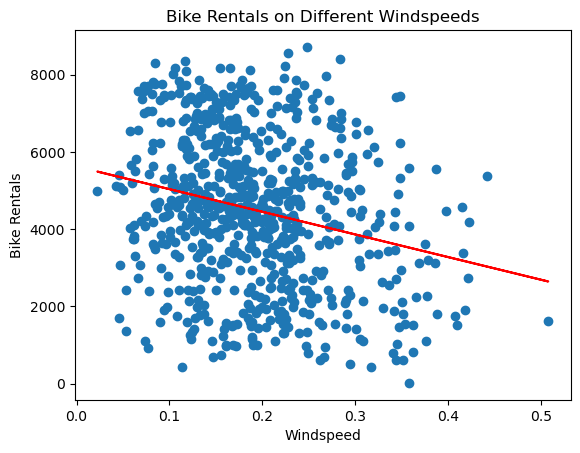

In [34]:
plt.scatter(df['windspeed'], df['cnt'])
plt.xlabel('Windspeed')
plt.ylabel('Bike Rentals')
plt.title('Bike Rentals on Different Windspeeds')

slope, intercept = np.polyfit(df['windspeed'], df['cnt'], 1)
regression_line = slope * df['windspeed'] + intercept

plt.plot(df['windspeed'], regression_line, color='red')
plt.show()

8. Last observations:

When analyzing the bike rental data, some interesting patterns emerged but some patterns were expected. For instance, bike rentals varied depending on the season, however, it was much more popular during the fall as per the data average compared to the Spring and other seasons. You could also see trends based on the day of the week. Weekends were less busy for rentals than weekdays, which honestly was not expected because that's when most people have time to enjoy being outdoors and would want to go outside for a ride. Nonholiday rental spiked on those days compared to regular holiday days. There seemed to be an overall increasing pattern in rentals over the two years. This could be due to things like the growing population and changing preferences. Additionally, when looking at relationships between different factors, a clear connection stood out - the warmer/cool weather it was, the more bikes were being rented. All in all, this data uncovered some interesting dynamics affecting bike rental demand. Things like the season, weather, day of the week, yearly trends, and the relationship between temperature and rentals all played important roles in patterns emerging. 
